In [1]:
import os
import glob

In [2]:
imgdir = '/Users/andrewrenninger/Desktop/R/git/sensing/sensing/data/2750' 
images = [] 

for file in glob.glob(imgdir + os.sep + "*" + os.sep + "*.jpg"):
  images.append(file)

len(images)

27000

In [3]:
%matplotlib inline

from skimage.io import imread_collection
from skimage.io import imread

from skimage.color import rgb2gray

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

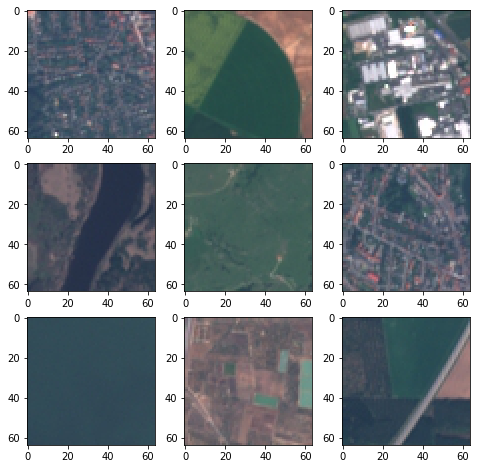

In [4]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      path = images[idx[slot]]
      img = imread(open(path, "rb"))
      axs[i, j].imshow(img)
        
plt.show()

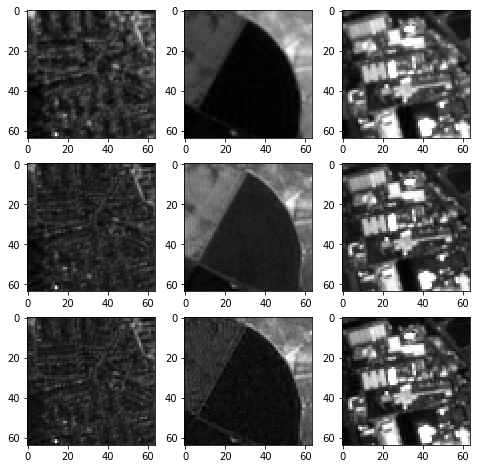

In [5]:
fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    path = images[idx[slot]]
    for j in np.arange(0, 3):
      img = imread(open(path, "rb"))
      axs[j, i].imshow(img[:,:, j], cmap = 'gray')
        
plt.show()

In [6]:
def vectorize(img):
    mat = imread(open(img, "rb"))
    bnw = rgb2gray(mat)
    out = bnw.squeeze().flatten()
    return out

In [7]:
series = pd.Series(images, name = "paths")
labels = series.str.split("/").str.get(10)

labels = pd.factorize(labels)

y = np.array(labels[0])

In [8]:
mat = imread(open(path, "rb"))
bnw = rgb2gray(mat)
out = bnw.squeeze().flatten()

In [9]:
mat = np.zeros([y.shape[0], out.shape[0]])

for i, tmp in series.to_frame().iterrows():
    mat[i] = vectorize(tmp.paths)

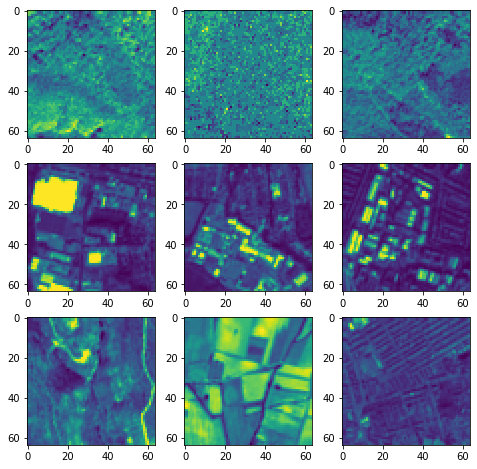

In [10]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      num = i*3+j
      dat = mat[idx[num]].reshape([64, 64])
      axs[i, j].imshow(dat)
        
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(mat, y, test_size = 0.5, random_state=42)

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout

EPOCH = 20
BATCH = int(y_train.shape[0] / EPOCH) 

In [19]:
model_one = Sequential()
model_one.add(Dense(num_classes, activation = 'relu', input_shape = (4096,)))

model_one.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40970     
Total params: 40,970
Trainable params: 40,970
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_one.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_one = model_one.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 0s 34us/step - loss: 9.9478 - accuracy: 0.1056 - val_loss: 10.1057 - val_accuracy: 0.1027
Epoch 2/20
13500/13500 [==============================] - 0s 26us/step - loss: 10.1252 - accuracy: 0.1010 - val_loss: 10.1057 - val_accuracy: 0.1106
Epoch 3/20
13500/13500 [==============================] - 0s 26us/step - loss: 10.1253 - accuracy: 0.1051 - val_loss: 10.1054 - val_accuracy: 0.1109
Epoch 4/20
13500/13500 [==============================] - 0s 25us/step - loss: 10.1248 - accuracy: 0.1061 - val_loss: 10.1087 - val_accuracy: 0.1037
Epoch 5/20
13500/13500 [==============================] - 0s 25us/step - loss: 10.1255 - accuracy: 0.1120 - val_loss: 10.1059 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 0s 27us/step - loss: 10.1247 - accuracy: 0.1159 - val_loss: 10.1062 - val_accuracy: 0.1096
Epoch 7/20
13500/13500 [==============================] -

In [23]:
score_one = model_one.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_one[0])
print("Test accuracy: ", score_one[1])

Test loss:  10.103894555833605
Test accuracy:  0.1111111119389534


In [21]:
model_two = Sequential()
model_two.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_two.add(Dense(num_classes, activation = 'relu'))

model_two.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 2,053,510
Trainable params: 2,053,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_two.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_two = model_two.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 71us/step - loss: 6.6594 - accuracy: 0.0993 - val_loss: 4.9147 - val_accuracy: 0.1120
Epoch 2/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9805 - accuracy: 0.1102 - val_loss: 4.8960 - val_accuracy: 0.1120
Epoch 3/20
13500/13500 [==============================] - 1s 68us/step - loss: 4.9707 - accuracy: 0.1078 - val_loss: 4.8932 - val_accuracy: 0.1120
Epoch 4/20
13500/13500 [==============================] - 1s 68us/step - loss: 4.9695 - accuracy: 0.1069 - val_loss: 4.8935 - val_accuracy: 0.1088
Epoch 5/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9683 - accuracy: 0.1144 - val_loss: 4.8929 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 1s 66us/step - loss: 4.9656 - accuracy: 0.1207 - val_loss: 4.8874 - val_accuracy: 0.1151
Epoch 7/20
13500/13500 [==============================] - 1s 68us/st

In [25]:
score_two = model_two.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_two[0])
print("Test accuracy: ", score_two[1])

Test loss:  4.826379513634576
Test accuracy:  0.17140740156173706


In [28]:
model_tre = Sequential()
model_tre.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(300, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(100, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(num_classes, activation = 'relu'))

model_tre.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [29]:
model_tre.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_tre = model_tre.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 95us/step - loss: 2.9214 - accuracy: 0.1015 - val_loss: 2.2986 - val_accuracy: 0.1143
Epoch 2/20
13500/13500 [==============================] - 1s 77us/step - loss: 2.3562 - accuracy: 0.1050 - val_loss: 2.3036 - val_accuracy: 0.1092
Epoch 3/20
13500/13500 [==============================] - 1s 77us/step - loss: 2.3382 - accuracy: 0.1032 - val_loss: 2.2971 - val_accuracy: 0.1096
Epoch 4/20
13500/13500 [==============================] - 1s 75us/step - loss: 2.3277 - accuracy: 0.1073 - val_loss: 2.2941 - val_accuracy: 0.1100
Epoch 5/20
13500/13500 [==============================] - 1s 76us/step - loss: 2.3216 - accuracy: 0.1095 - val_loss: 2.2955 - val_accuracy: 0.1096
Epoch 6/20
13500/13500 [==============================] - 1s 74us/step - loss: 2.3155 - accuracy: 0.1068 - val_loss: 2.2907 - val_accuracy: 0.1092
Epoch 7/20
13500/13500 [==============================] - 1s 82us/st

In [30]:
score_tre = model_tre.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_tre[0])
print("Test accuracy: ", score_tre[1])

Test loss:  2.0502319268827085
Test accuracy:  0.21111111342906952
